In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Datasets/Housing_dataset/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<IPython.core.display.Javascript object>


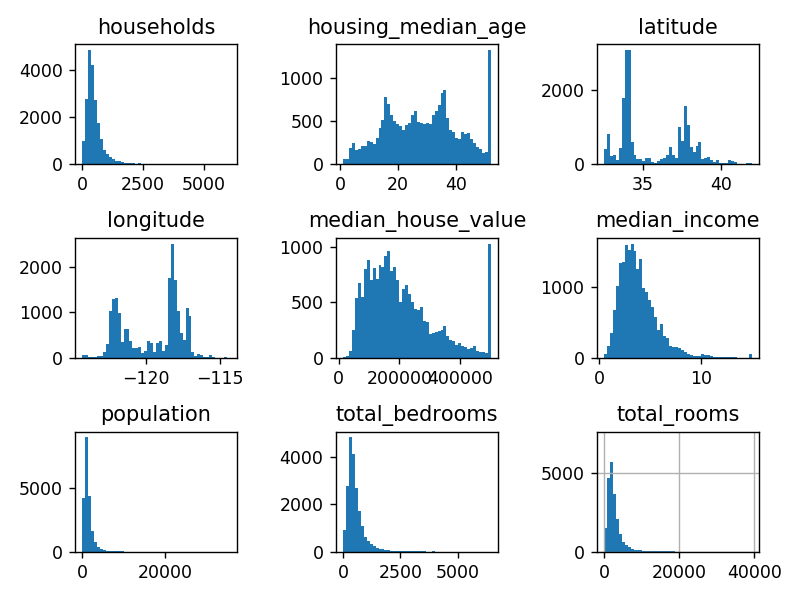

In [5]:
fig, ax = plt.subplots(3,3)

In [6]:
df.hist(bins=50,ax = ax,grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11D90C70>,
      dtype=object)

In [7]:
fig.tight_layout()

In [8]:
df.median_income.hist(bins=50)

In [9]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)  # Where True, keep original, where False, replace with 5.0

In [10]:
df.income_cat.hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_index, test_index in split.split(df, df["income_cat"]):  
    print(train_index, test_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [13]:
len(train_index)

16512

In [14]:
len(test_index)

4128

In [15]:
4128/(4128+16512)  # Test index is 20% as specified.

0.2

In [16]:
df.income_cat.value_counts()/len(df) * 100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64

## Propotions of strat_test_set and df are almost equal, this is the meaning of stratified sampling as it represents the whole population.

In [17]:
strat_test_set.income_cat.value_counts()/len(strat_test_set) * 100

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64

In [18]:
df = strat_train_set.copy()

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0


<IPython.core.display.Javascript object>


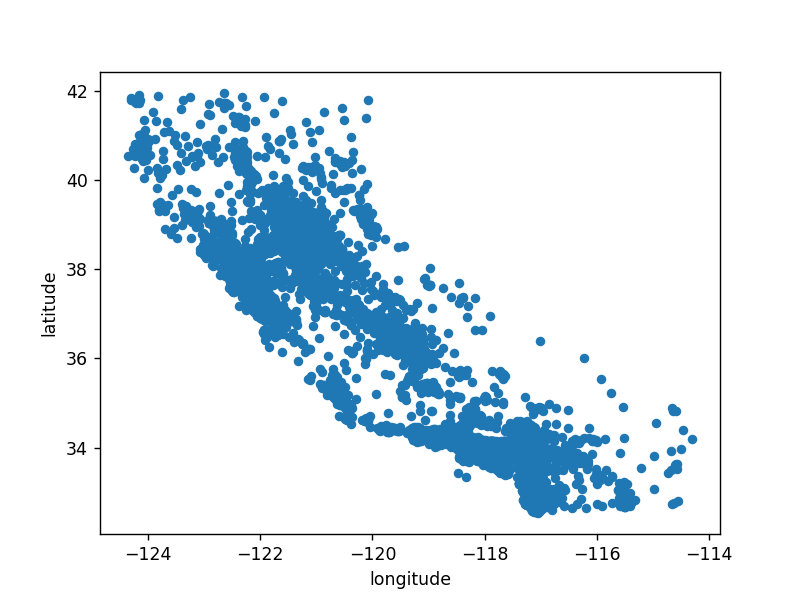

In [20]:
df.plot(kind="scatter", x="longitude", y="latitude") # Messy plot

<IPython.core.display.Javascript object>


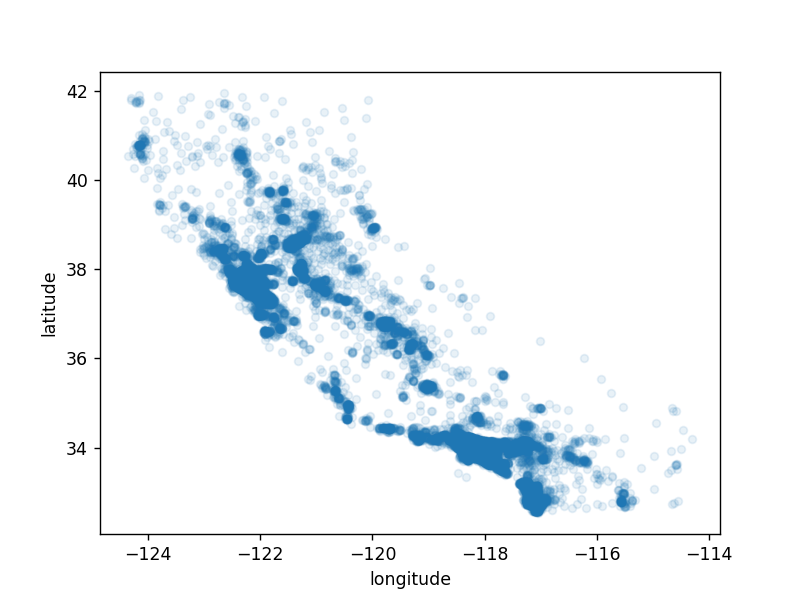

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)  # More like heat map, easy to visualize the density too !

<IPython.core.display.Javascript object>


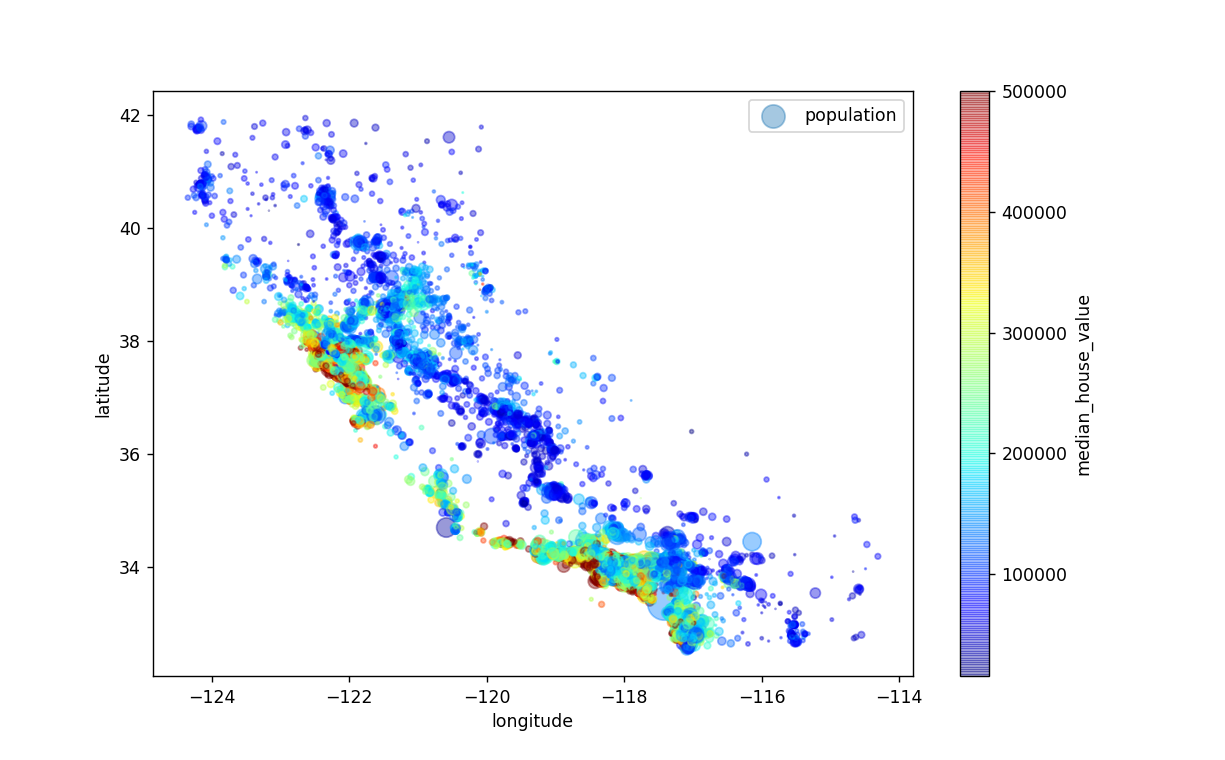

In [27]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [23]:
corr_matrix = df.corr()

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000


In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False).plot(kind='bar',rot=25)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


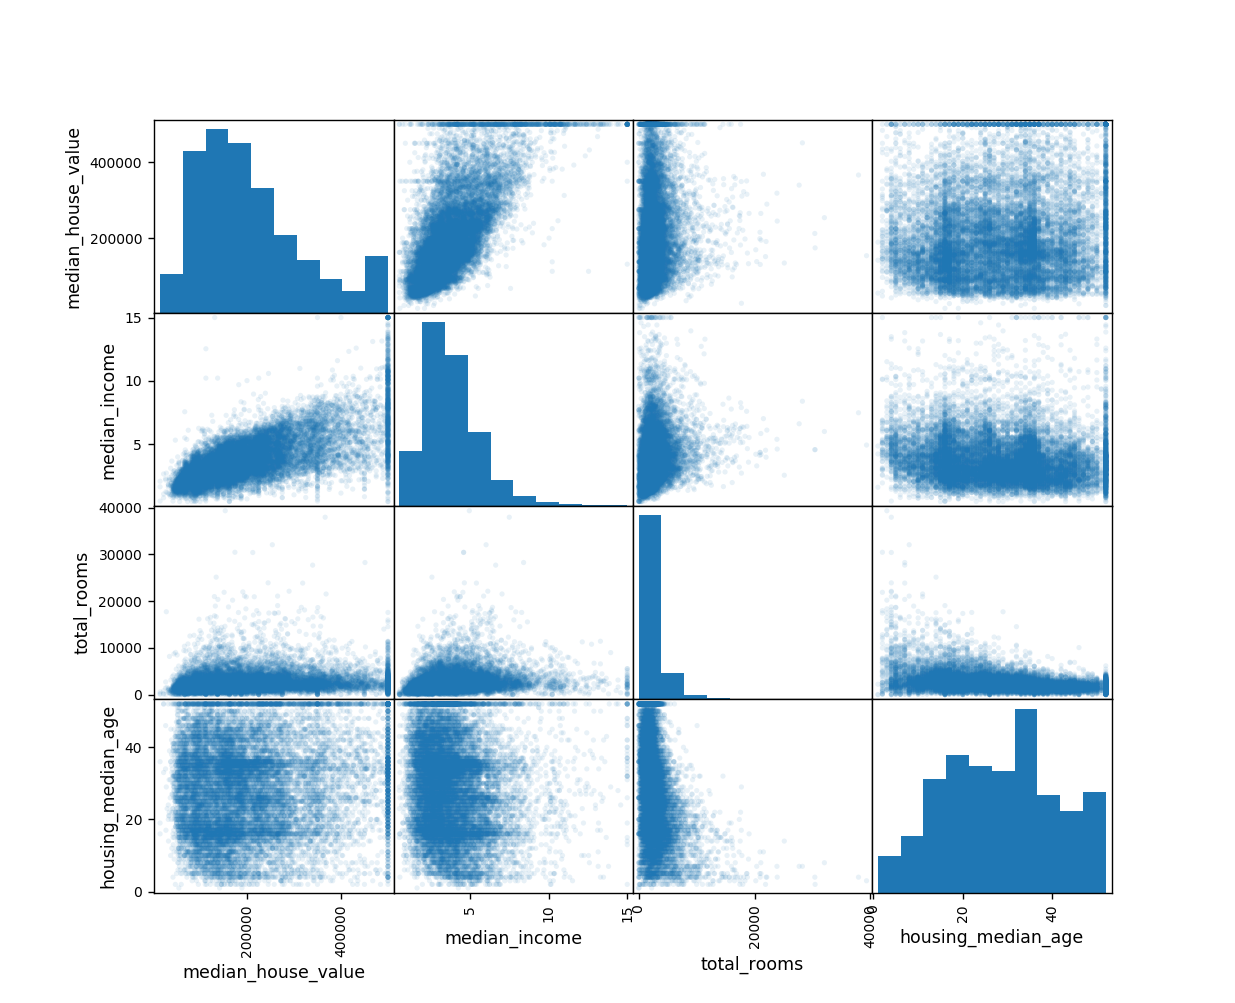

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15C5F290>,
      dtype=object)

In [26]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.1)

In [28]:
strat_train_set.drop("median_house_value", axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN,1.0


In [32]:
from sklearn.preprocessing import Imputer

In [33]:
imputer = Imputer(strategy='median')

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
imputer.transform?  # Impute all missing values in X.

In [37]:
df_num = df.drop("ocean_proximity", axis=1)  # Drop string column to commpute medians

In [39]:
imputer.fit(df_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05,  3.0000e+00])

In [42]:
X = imputer.transform(df_num)  # Fills missing valuses with median (the strategy)

In [43]:
X  # Numpy array, convert it to DataFrame instead

array([[-1.21890e+02,  3.72900e+01,  3.80000e+01, ...,  2.70420e+00,
         2.86600e+05,  2.00000e+00],
       [-1.21930e+02,  3.70500e+01,  1.40000e+01, ...,  6.42140e+00,
         3.40600e+05,  5.00000e+00],
       [-1.17200e+02,  3.27700e+01,  3.10000e+01, ...,  2.86210e+00,
         1.96900e+05,  2.00000e+00],
       ...,
       [-1.16400e+02,  3.40900e+01,  9.00000e+00, ...,  3.27230e+00,
         9.78000e+04,  3.00000e+00],
       [-1.18010e+02,  3.38200e+01,  3.10000e+01, ...,  4.06250e+00,
         2.25900e+05,  3.00000e+00],
       [-1.22450e+02,  3.77700e+01,  5.20000e+01, ...,  3.57500e+00,
         5.00001e+05,  3.00000e+00]])

In [46]:
housing_tr = pd.DataFrame(X, columns=df_num.columns)

In [47]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,3.0
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,3.0
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,5.0
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,4.0
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,2.0
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,1.0


## Handling Text and Categorical Attributes
Earlier we left out the categorical attribute ocean_proximity because it is a text
attribute so we cannot compute its median. Most Machine Learning algorithms pre‐
fer to work with numbers anyway, so let’s convert these text labels to numbers.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [52]:
housing_cat = df["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [56]:
encoder.classes_  # [0,1,2,3,4,]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [57]:
from sklearn.preprocessing import LabelBinarizer             # One Hot categorical method
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int32)